In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
data=pd.read_csv("polynomial-regression.csv")

In [3]:
print(data.info())
print("********************************************************")
print(data.head())
print("********************************************************")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   araba_fiyat    15 non-null     int64
 1   araba_max_hiz  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes
None
********************************************************
   araba_fiyat  araba_max_hiz
0           60            180
1           70            180
2           80            200
3          100            200
4          120            200
********************************************************
       araba_fiyat  araba_max_hiz
count    15.000000      15.000000
mean    598.666667     274.333333
std     838.824574      77.364321
min      60.000000     180.000000
25%     110.000000     200.000000
50%     250.000000     240.000000
75%     625.000000     355.000000
max    3000.000000     365.000000


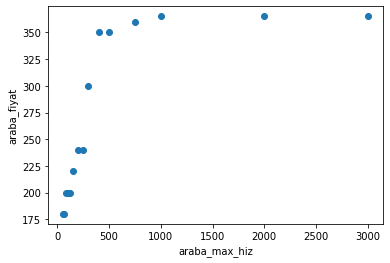

In [4]:
x = data.araba_fiyat.values.reshape(-1,1)
y = data.araba_max_hiz.values.reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

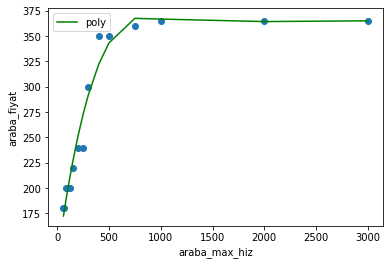

r_square score:  0.9694743021235677


In [5]:
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynominal_regression = PolynomialFeatures(degree=4)
x_polynomial = polynominal_regression.fit_transform(x,y)

# %% fit
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)
# %%
y_head2 = linear_regression.predict(x_polynomial)

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head2))

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=sns.load_dataset("tips")
df=pd.DataFrame(data)

#EKSİK VERİ DOLDURMA
from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(missing_values=np.nan, strategy="mean") #eksik verileri boş sütünlarına ortalamasını verdik
imputer=imputer.fit(df[["total_bill"]])
df[["total_bill"]]=imputer.transform(df[["total_bill"]])

#KATEGORİK OLMAYAN DEĞİŞKENLER
total_bill=df[["total_bill"]]
tip=df[["tip"]]
size=df[["size"]]

#KATEGORİK DEĞİŞKENLER

import pandas as pd
smoker=pd.get_dummies(df[["smoker"]])
time=pd.get_dummies(df[["day"]])

result=df["day"].value_counts()

#KUKLA (DUMMIES) DEĞİŞKENİNİ KALDIRMA
smoker=smoker.drop("smoker_Yes",axis=1)

#VERİLERİ BİRLEŞTİRME
new_data=pd.concat([total_bill,size,smoker,time,tip],axis=1) # tahmin etmek istedğiniz değeri sona koyun train test split için kolaylık sağlar

#TRAİN VE TEST BELİRLEME
training=new_data.iloc[:,0:1].values # 7 ye kadarkı stunlar train için
testing=new_data.iloc[:,7:8].values

#TRAİN VE TEST AYIRMA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import *
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [8]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_reg=PolynomialFeatures(degree=3)
xp=polynomial_reg.fit_transform(x_train)

In [9]:
linear_reg2=LinearRegression()
linear_reg2.fit(xp,y_train)

LinearRegression()

In [10]:
y_pred=linear_reg2.predict(polynomial_reg.fit_transform(x_test))
y_tahmin=pd.DataFrame(data=y_pred)
y_normal=pd.DataFrame(data=y_test)
y_tahmin.index=y_normal.index
result=pd.concat([y_tahmin,y_normal],axis=1)
result.columns=[["Tahmin","Gerçek"]]
print(result)

      Tahmin Gerçek
0   3.237092   3.18
1   1.372557   2.00
2   3.561759   2.00
3   3.633816   5.16
4   2.345095   2.00
..       ...    ...
69  3.560089   3.48
70  3.232742   2.00
71  3.750835   3.00
72  2.982518   2.71
73  3.222201   3.00

[74 rows x 2 columns]
